## K-평균 군집화

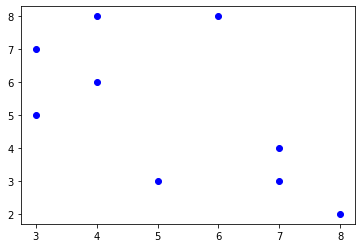

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

points = [(3,5),(4,6),(5,3),(3,7),(6,8),(7,4),(4,8),(7,3),(8,2)]
labels = ['x', 'y']
data = pd.DataFrame(points, columns=labels)
plt.plot(data.x,data.y,'bo')
plt.show()

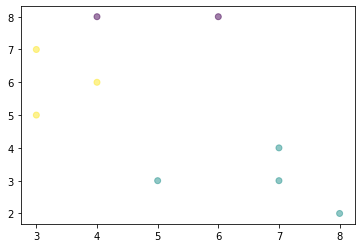

In [8]:
model = KMeans(n_clusters=3, init='random')  #3개의 군집, 랜덤으로 초기화 
#init 값 지정하지 않으면 k-means++라는 방안에 의해 초기점이 정해짐
model.fit(data) 
predict = pd.DataFrame(model.predict(data)) 
predict.columns=['predict']  
data_cluster = pd.concat([data,predict],axis=1) 

plt.scatter(data_cluster.x, data_cluster.y, c=data_cluster.predict, alpha=0.5)  

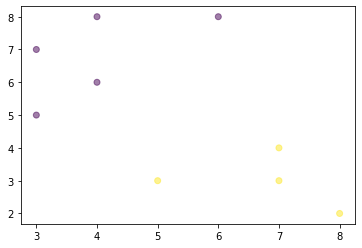

In [9]:
model = KMeans(n_clusters=2)  
model.fit(data) 
predict = pd.DataFrame(model.predict(data)) 
predict.columns=['predict']  
data_cluster = pd.concat([data,predict],axis=1) 

plt.scatter(data_cluster.x, data_cluster.y, c=data_cluster.predict, alpha=0.5)  

### telecom 통화량을 활용한 k-평균 군집화

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

t = pd.read_csv("data/telecom.csv")
t.dropna() # 누락된 데이터가 포함된 행 제거
t_features = t[['LONGDIST', 'International', 'LOCAL']]
t_features.describe()

,LONGDIST,International,LOCAL
count,1477.000000,1477.000000,1477.000000
mean,13.637284,0.836382,51.364432
std,9.394239,2.236858,54.682594
min,0.000000,0.000000,0.049147
25%,5.173330,0.000000,13.460000
50%,13.683000,0.000000,35.014400
75%,22.078400,0.000000,71.661400
max,29.982000,9.950900,450.624000


In [11]:
from sklearn.preprocessing import MinMaxScaler #모두 0과 1 사이로 변경
from sklearn.cluster import KMeans

scaler_m = MinMaxScaler()
t_features_m = pd.DataFrame(scaler_m.fit_transform(t_features))
t_features_m.columns = [['LONGDIST_m', 'International_m', 'LOCAL_m']]
t_features_m.describe()

,LONGDIST_m,International_m,LOCAL_m
count,1477.000000,1477.000000,1477.000000
mean,0.454849,0.084051,0.113888
std,0.313329,0.224790,0.121362
min,0.000000,0.000000,0.000000
25%,0.172548,0.000000,0.029764
50%,0.456374,0.000000,0.077601
75%,0.736388,0.000000,0.158935
max,1.000000,1.000000,1.000000


In [12]:
model = KMeans(n_clusters=3)
model.fit(t_features_m)
predict = pd.DataFrame(model.predict(t_features_m))
predict.columns=['predict']    
data_cluster = pd.concat([t_features_m,predict],axis=1) 
data_cluster.columns = [['LONGDIST_m', 'International_m', 'LOCAL_m', 'predict']]

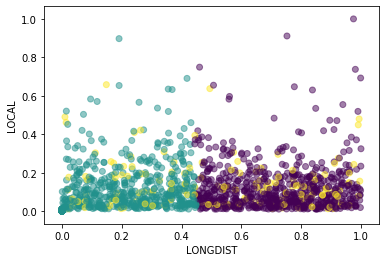

In [13]:
plt.scatter(data_cluster.LONGDIST_m, data_cluster.LOCAL_m, c=data_cluster.predict, alpha=0.5)
plt.xlabel('LONGDIST')
plt.ylabel('LOCAL')
plt.show()

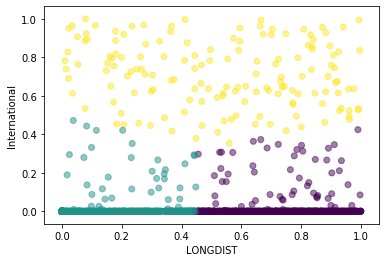

In [14]:
plt.scatter(data_cluster.LONGDIST_m, data_cluster.International_m, c=data_cluster.predict, alpha=0.5)
plt.xlabel('LONGDIST')
plt.ylabel('International')
plt.show()

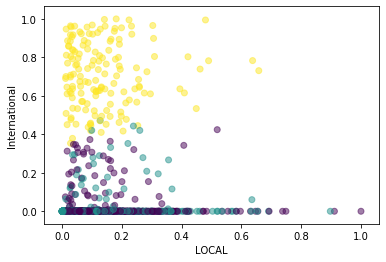

In [15]:
plt.scatter(data_cluster.LOCAL_m, data_cluster.International_m, c=data_cluster.predict, alpha=0.5)
plt.xlabel('LOCAL')
plt.ylabel('International')
plt.show()

In [20]:
data_cluster.columns = data_cluster.columns.get_level_values(0) #멀티 인덱스 해제
grouped = data_cluster.groupby('predict') #군집에 따라 그룹화
grouped.mean()

,LONGDIST_m,International_m,LOCAL_m
predict,,,
0,0.720688,0.014740,0.122551
1,0.173336,0.010533,0.099960
2,0.530922,0.711230,0.137308


### Elbow 방안

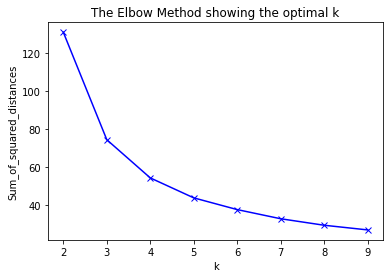

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

t = pd.read_csv("data/telecom.csv")
t.dropna() # 누락된 데이터가 포함된 행 제거
t_features = t[['LONGDIST', 'International', 'LOCAL']]

scaler_m = MinMaxScaler()
t_features_m = pd.DataFrame(scaler_m.fit_transform(t_features))
t_features_m.columns = [['LONGDIST_m', 'International_m', 'LOCAL_m']]

# k means determine k
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(t_features_m)
    Sum_of_squared_distances.append(km.inertia_) #inertia_에 total within-cluster sum of squared 값이 존재

# Plot the elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

3 또는 4 정도에서 가장 좋은 성과를 갖는다.

### 실루엣 스코어

/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

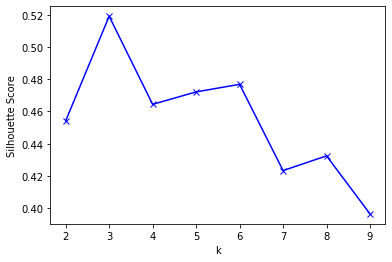

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

t = pd.read_csv("data/telecom.csv")
t.dropna() 
t_features = t[['LONGDIST', 'International', 'LOCAL']]

scaler_m = MinMaxScaler()
t_features_m = pd.DataFrame(scaler_m.fit_transform(t_features))
t_features_m.columns = [['LONGDIST_m', 'International_m', 'LOCAL_m']]

si = list()
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(t_features_m)
    predict = pd.DataFrame(km.predict(t_features_m))
    predict.columns=['predict']  
    si.append(silhouette_score(t_features_m, predict, metric='euclidean'))
    
plt.plot(K, si, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

3에서 가장 좋은 성과를 갖는다.

## DBSCAN

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

t = pd.read_csv("data/telecom.csv")
t.dropna() 
t_features = t[['LONGDIST', 'International', 'LOCAL']]

scaler_m = MinMaxScaler()
t_features_m = pd.DataFrame(scaler_m.fit_transform(t_features))
t_features_m.columns = [['LONGDIST_m', 'International_m', 'LOCAL_m']]

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(t_features_m)
t_features_m['Label'] = dbscan.labels_
#eps: epsilon, min_samples, dbscan.labels_: 각 데이터가 속한 군집 번호

In [18]:
t_features_m.columns = t_features_m.columns.get_level_values(0)
grouped = t_features_m.groupby('Label')
grouped.mean()

,LONGDIST_m,International_m,LOCAL_m
Label,,,
-1,0.528388,0.463555,0.197201
0,0.437243,0.000313,0.092668
1,0.040410,0.000000,0.338632
2,0.744388,0.000000,0.321801
3,0.966632,0.000000,0.357014


-1로 Label 된 데이터가 이상치이다.

In [19]:
grouped.count()

,LONGDIST_m,International_m,LOCAL_m
Label,,,
-1,267,267,267
0,1196,1196,1196
1,5,5,5
2,5,5,5
3,4,4,4


In [13]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(t_features_m)
t_features_m['Label'] = dbscan.labels_

In [14]:
t_features_m.columns = t_features_m.columns.get_level_values(0)
grouped = t_features_m.groupby('Label')
grouped.mean()

,LONGDIST_m,International_m,LOCAL_m
Label,,,
-1,0.673305,0.356322,0.566644
0,0.527314,0.462182,0.179563
1,0.437243,0.000313,0.092668
2,0.040410,0.000000,0.338632
3,0.744388,0.000000,0.321801


In [16]:
grouped.count()

,LONGDIST_m,International_m,LOCAL_m
Label,,,
-1,14,14,14
0,257,257,257
1,1196,1196,1196
2,5,5,5
3,5,5,5


In [31]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(t_features_m)
t_features_m['Label'] = dbscan.labels_

t_features_m.columns = t_features_m.columns.get_level_values(0)
grouped = t_features_m.groupby('Label')
grouped.mean()

,LONGDIST_m,International_m,LOCAL_m
Label,,,
-1,0.428824,0.457156,0.279429
0,0.427536,0.000031,0.051812
1,0.757167,0.666620,0.088891
2,0.473826,0.299460,0.068201
3,0.501044,0.011980,0.230891
4,0.799317,0.000000,0.184321
5,0.465383,0.819062,0.068631
6,0.065829,0.915032,0.067239
7,0.288310,0.000000,0.259397


In [32]:
grouped.count()

,LONGDIST_m,International_m,LOCAL_m
Label,,,
-1,106,106,106
0,881,881,881
1,69,69,69
2,10,10,10
3,300,300,300
4,18,18,18
5,9,9,9
6,5,5,5
7,6,6,6


## 가우시안 혼합

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

t = pd.read_csv("data/telecom.csv")
t.dropna() 
t_features = t[['LONGDIST', 'International', 'LOCAL']]

scaler_m = MinMaxScaler()
t_features_m = pd.DataFrame(scaler_m.fit_transform(t_features))
t_features_m.columns = [['LONGDIST_m', 'International_m', 'LOCAL_m']]

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(t_features_m)

GaussianMixture(n_components=3, n_init=10)

In [36]:
# 데이터가 속한 군집 번호

gm.predict(t_features_m)

array([2, 1, 0, ..., 2, 0, 0])

In [37]:
# 데이가 군집별로 속할 확률

gm.predict_proba(t_features_m)

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.23826650e-04, 9.99876161e-01, 1.24668860e-08],
       [9.99877830e-01, 0.00000000e+00, 1.22170441e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99774646e-01, 0.00000000e+00, 2.25353516e-04],
       [9.99785587e-01, 0.00000000e+00, 2.14412583e-04]])

In [38]:
gm.bic(t_features_m)

-16869.56547167262

In [39]:
gm.aic(t_features_m)

-17023.200751866032

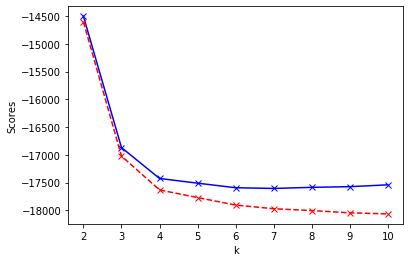

In [40]:
bic = list()
aic = list()

K = range(2,11)
for k in K:
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(t_features_m)
    bic.append(gm.bic(t_features_m))
    aic.append(gm.aic(t_features_m))
    
plt.plot(K, bic, 'bx-')
plt.plot(K, aic, 'rx--')
plt.xlabel('k')
plt.ylabel('Scores')
plt.show()

bic와 aic 모두 보았을 때 k값을 6으로 선택

### 베이즈 가우시안 혼합 모델

In [42]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(t_features_m)
np.round(bgm.weights_, 2)

array([0.68, 0.03, 0.05, 0.13, 0.  , 0.07, 0.03, 0.  , 0.  , 0.  ])

In [49]:
clus = bgm.predict(t_features_m)

unique, counts = numpy.unique(clus, return_counts=True)
dict(zip(unique, counts))

{0: 1008, 1: 44, 2: 71, 3: 201, 4: 4, 5: 108, 6: 41}

In [50]:
t_features_m['Label'] = clus
t_features_m.columns = t_features_m.columns.get_level_values(0)
grouped = t_features_m.groupby('Label')
grouped.mean()

,LONGDIST_m,International_m,LOCAL_m
Label,,,
0,0.521026,0.000155,0.113528
1,0.545547,0.154654,0.071323
2,0.221825,0.667051,0.185262
3,0.011679,0.000128,0.008801
4,0.943952,0.573764,0.463933
5,0.730035,0.620852,0.109190
6,0.534073,0.010943,0.538233


### 연습문제

- https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score

happy = pd.read_csv('data/WorldHappiness-2019.csv')

In [60]:
happy.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [61]:
happy.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [62]:
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
           locations = happy['Country or region'],
           locationmode = 'country names',
           z = happy['Score'], 
           text = happy['Country or region'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2019', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [72]:
happy1 = happy.drop(['Overall rank', 'Country or region'], axis=1)

ss = StandardScaler()
happy1s = pd.DataFrame(ss.fit_transform(happy1))
happy1s.columns = happy1.columns

model = KMeans(n_clusters=5)
model.fit(happy1s)
predict = pd.DataFrame(model.predict(happy1s))
predict.columns=['predict']    
happy1sp = pd.concat([happy1s,predict],axis=1) 

happy1sp.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,predict
0,2.128711,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757,4
1,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158,4
2,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941,4
3,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500,4
4,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632,4


In [73]:
happy1sp.predict.value_counts()

2    43
3    39
1    33
4    23
0    18
Name: predict, dtype: int64

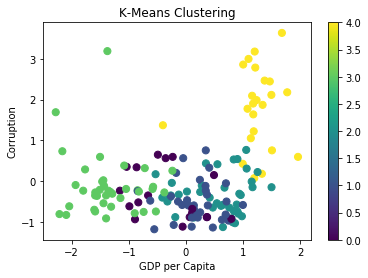

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(happy1sp['GDP per capita'],happy1sp['Perceptions of corruption'],
                     c=happy1sp['predict'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

- 실루엣 스코어

/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/fastbat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/fastbat/anaconda3/lib

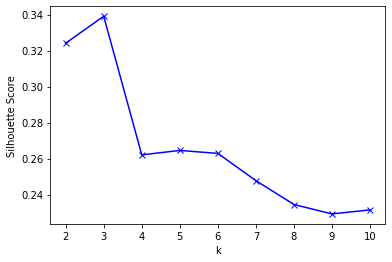

In [75]:
si = list()
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(happy1s)
    predict = pd.DataFrame(km.predict(happy1s))
    predict.columns=['predict']  
    si.append(silhouette_score(happy1s, predict, metric='euclidean'))
    
plt.plot(K, si, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

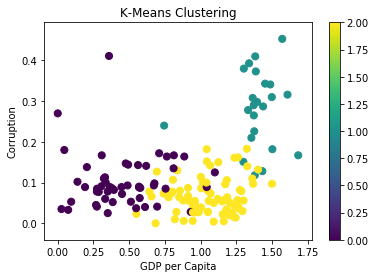

In [82]:
model = KMeans(n_clusters=3)
model.fit(happy1s)
predict = pd.DataFrame(model.predict(happy1s))
predict.columns=['predict']    
happy1f = pd.concat([happy,predict],axis=1) 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(happy1f['GDP per capita'],happy1f['Perceptions of corruption'],
                     c=happy1f['predict'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

In [96]:
happy1f0 = happy1f[happy1f.predict == 0]
happy1f0.iloc[:,1]

66                     Pakistan
73                   Tajikistan
84                      Nigeria
91                    Indonesia
94                       Bhutan
95                     Cameroon
97                        Ghana
98                  Ivory Coast
99                        Nepal
101                       Benin
102         Congo (Brazzaville)
104                        Laos
108                    Cambodia
110                     Senegal
111                     Somalia
113                       Niger
114                Burkina Faso
116                        Iran
117                      Guinea
118                     Georgia
119                      Gambia
120                       Kenya
121                  Mauritania
122                  Mozambique
124                  Bangladesh
125                        Iraq
126            Congo (Kinshasa)
127                        Mali
128                Sierra Leone
130                     Myanmar
131                        Chad
133     

In [97]:
happy1f1 = happy1f[happy1f.predict == 1]
happy1f1.iloc[:,1]

0                  Finland
1                  Denmark
2                   Norway
3                  Iceland
4              Netherlands
5              Switzerland
6                   Sweden
7              New Zealand
8                   Canada
9                  Austria
10               Australia
13              Luxembourg
14          United Kingdom
15                 Ireland
16                 Germany
17                 Belgium
18           United States
20    United Arab Emirates
21                   Malta
28                   Qatar
33               Singapore
40              Uzbekistan
75               Hong Kong
Name: Country or region, dtype: object

In [98]:
happy1f2 = happy1f[happy1f.predict == 2]
happy1f2.iloc[:,1]

11                  Costa Rica
12                      Israel
19              Czech Republic
22                      Mexico
23                      France
24                      Taiwan
25                       Chile
26                   Guatemala
27                Saudi Arabia
29                       Spain
30                      Panama
31                      Brazil
32                     Uruguay
34                 El Salvador
35                       Italy
36                     Bahrain
37                    Slovakia
38           Trinidad & Tobago
39                      Poland
41                   Lithuania
42                    Colombia
43                    Slovenia
44                   Nicaragua
45                      Kosovo
46                   Argentina
47                     Romania
48                      Cyprus
49                     Ecuador
50                      Kuwait
51                    Thailand
                ...           
76          Dominican Republic
77      

In [109]:
happy1f.iloc[:,[0,9,10]]
data = [dict(type='choropleth',
             locations = happy1f['Country or region'],
             locationmode = 'country names',
             z = happy1f['predict'],
             text = happy1f['Country or region'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)